In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

import os
from pprint import pprint
import xml.etree.ElementTree as ET
import json
from pathlib import Path

In [4]:
DATASET_PATH = "../datasets/table-detection-dataset/"
DATASET_IMAGES_PATH = DATASET_PATH + "Images/"

In [14]:
def imshow(image, fac=200):
    fig = plt.figure(figsize=(image.shape[0]/fac, image.shape[1]/fac))
    ax = fig.add_subplot()
    ax.imshow(image)
    ax.set_xticks([])
    ax.set_yticks([])

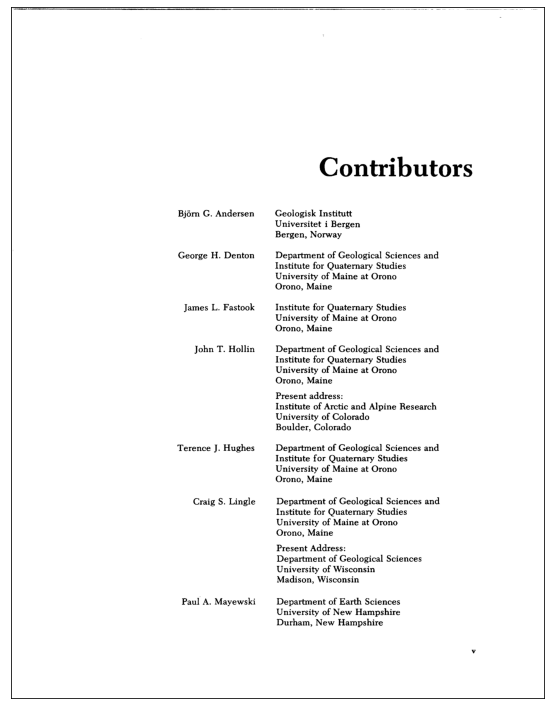

In [15]:
imshow(cv2.imread(DATASET_IMAGES_PATH + "0101_003.png"))

In [17]:
len(os.listdir(DATASET_IMAGES_PATH))

403

In [21]:
df_train = pd.read_csv(DATASET_PATH + "train.csv")

In [26]:
df_train.head()

,file_name,xmin,ymin,xmax,ymax,class
0,0101_003.png,770,946,2070,2973,table
1,0110_099.png,270,1653,2280,2580,table
2,0113_013.png,303,343,2273,2953,table
3,0140_007.png,664,1782,1814,2076,table
4,0146_281.png,704,432,1744,1552,table


In [29]:
len(df_train["file_name"].unique())

403

In [44]:
def anshow(name, fac=100):
    img = cv2.imread(DATASET_IMAGES_PATH + name)
    base_name = ".".join(name.split(".")[:-1])
    # df_train[df_train["file_name"] == name]

    for i, entry in df_train[df_train["file_name"] == name].iterrows():
        # print(entry)
        x1, y1, x2, y2 = entry[1], entry[2], entry[3], entry[4]
        img = cv2.rectangle(img, (x1, y1), (x2, y2), color=(0, 0, 255), thickness=2)

    imshow(img, fac)

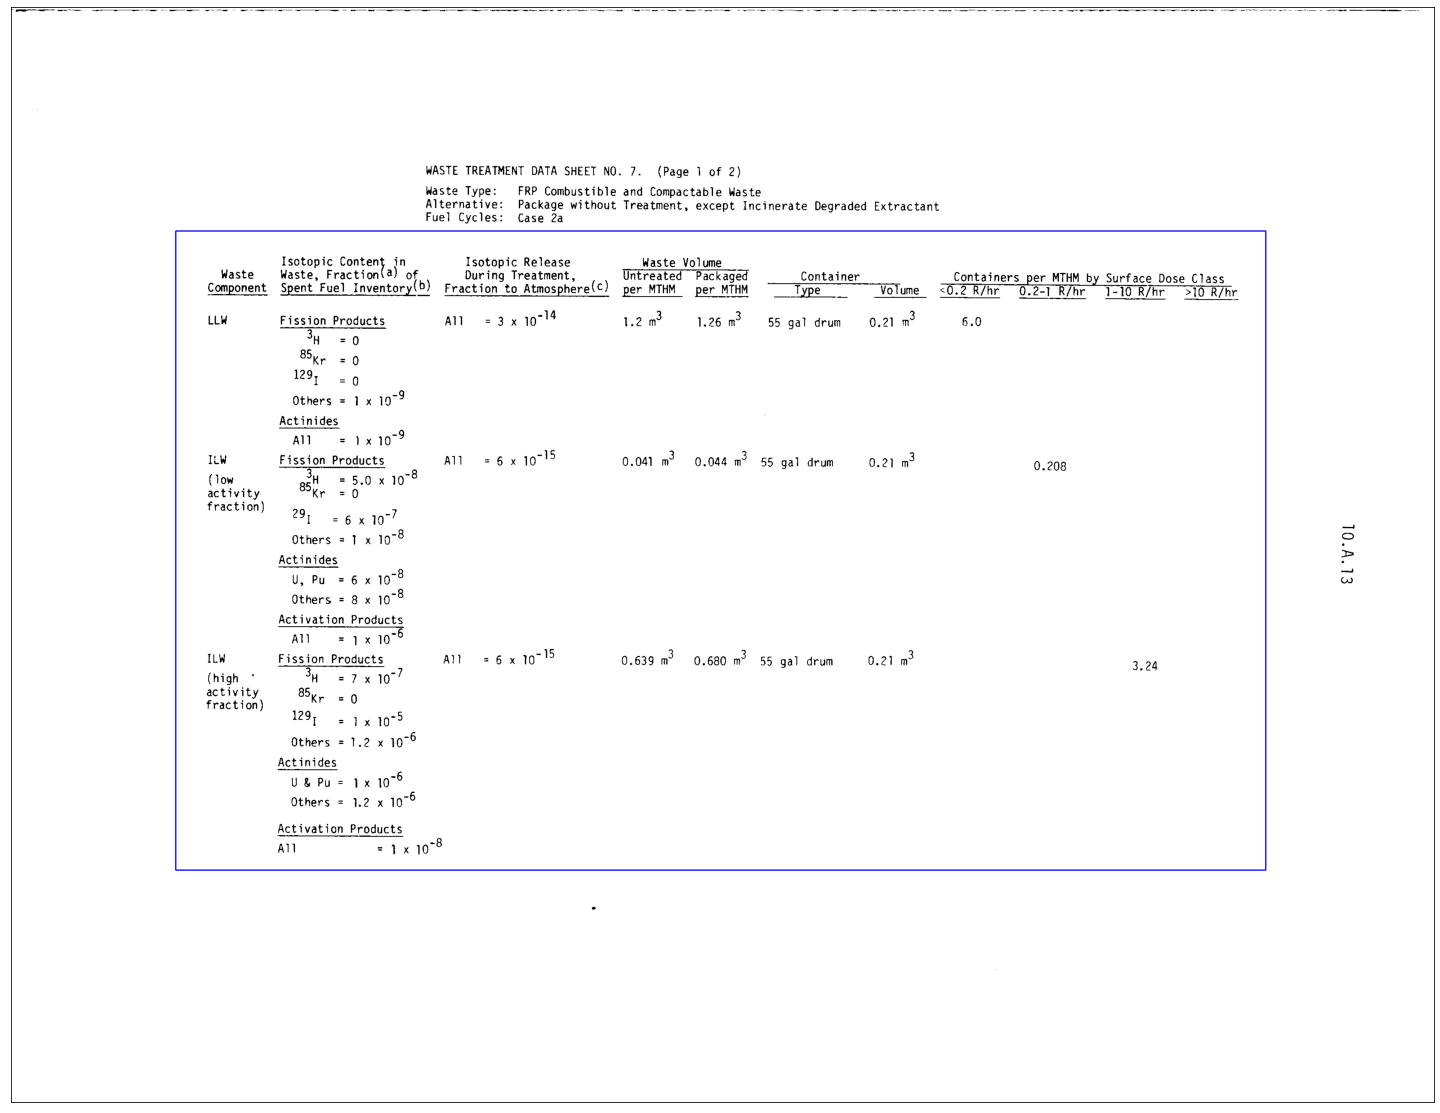

In [49]:
anshow("0154_080.png")

In [53]:
def save_annotation(name):
    img = cv2.imread(DATASET_IMAGES_PATH + name)
    if img is None:
        return
    base_name = ".".join(name.split(".")[:-1])
    # df_train[df_train["file_name"] == name]
    mask = np.zeros((img.shape[0], img.shape[1]))

    for i, entry in df_train[df_train["file_name"] == name].iterrows():
        # print(entry)
        x1, y1, x2, y2 = entry[1], entry[2], entry[3], entry[4]
        mask[y1:y2, x1:x2] = 255

    cv2.imwrite(DATASET_PATH + "Masks/" + base_name + "_mask.png", mask)

In [55]:
for name in df_train['file_name']:
    save_annotation(name)

[ WARN:0@1755.910] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../datasets/table-detection-dataset/Images/0101_003.png'): can't open/read file: check file path/integrity
[ WARN:0@1755.979] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../datasets/table-detection-dataset/Images/0113_013.png'): can't open/read file: check file path/integrity
